# The SparksFoundation- GRIP internship #June 2021
 Exploratory Data Analysis Retail Superstore


# By Ayushi Ojashwi

# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
data=pd.read_csv('C:\\Users\HP\Desktop\everything\Internships\sparks\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Dataset Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
data.shape

(9994, 13)

In [15]:
data.isnull().sum().sum()
#checking for null data presence

0

# Data Cleaning

In [11]:
#Droping off unwanted data here
data.drop(['Country','Postal Code'],inplace=True, axis=1)

# Corelation

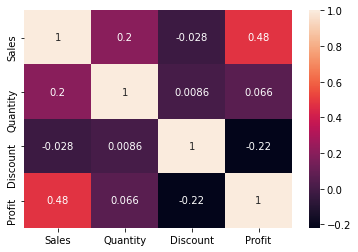

In [16]:
figure_1=data.corr()
sns.heatmap(figure_1,annot=True)

From the correlation coefficients it is evident that relation between variables is not strong enough.
    * Discount and Profit,Discount and Sales are negatively Correlated.
    * Sales and profit are neutrually correlated

# Data Visualisation

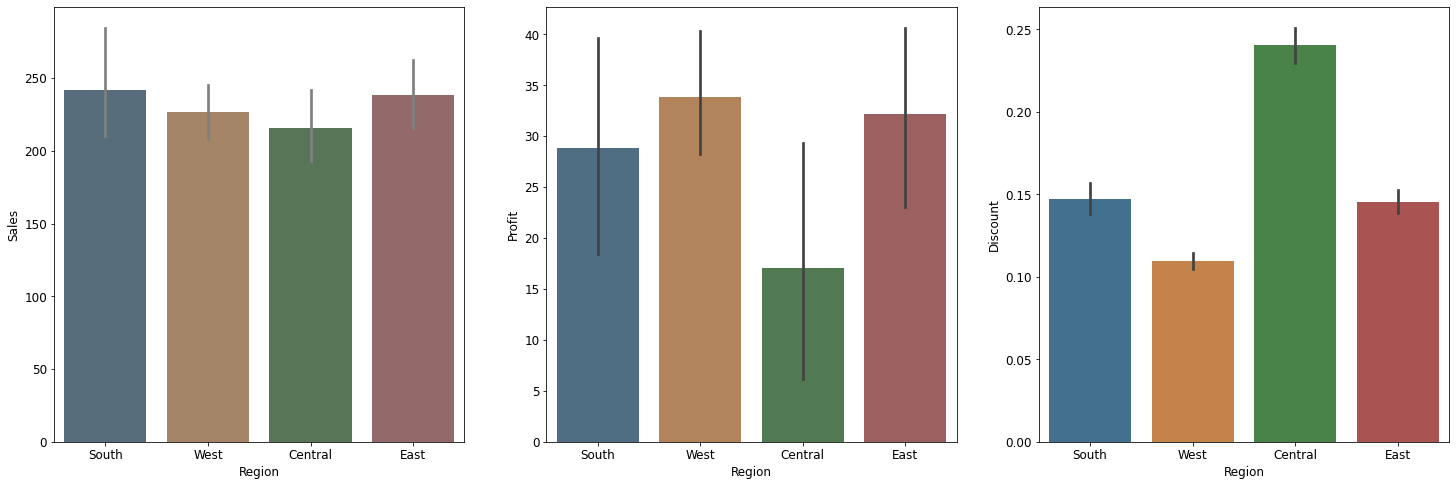

In [53]:
fig, ax =plt.subplots(1,3,figsize=(25,8))
sns.barplot(x='Region', y='Sales', data = data,ax=ax[0],saturation=0.25,errcolor='0.50')
sns.barplot(x='Region', y='Profit', data = data,ax=ax[1],saturation=0.35)
sns.barplot(x='Region', y='Discount', data = data,ax=ax[2],saturation=0.50)
plt.show()
#Plotiing for Sales,profit and discount based on region

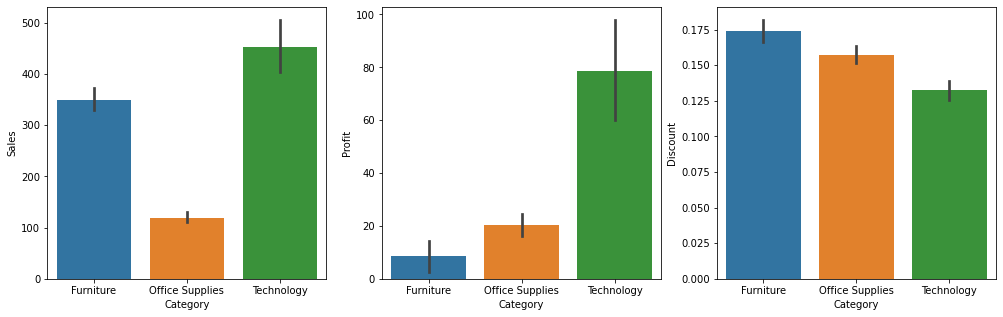

In [19]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Category', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Category', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Category', y='Discount', data = data,ax=ax[2])
plt.show()
#Plotiing sales,profit and discount on basis of category

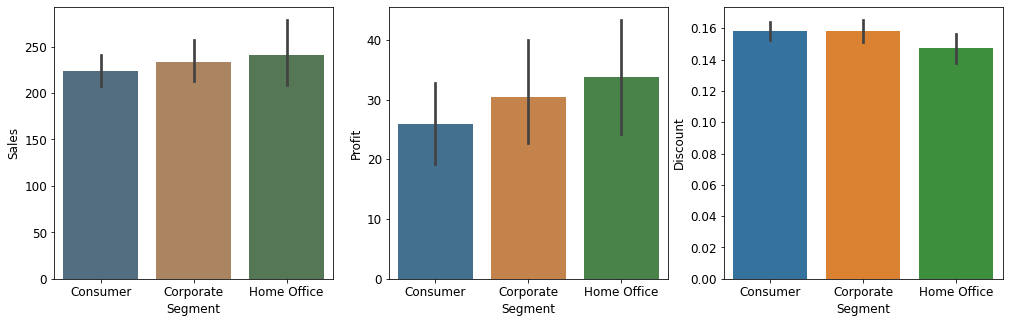

In [55]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Segment', y='Sales', data = data,ax=ax[0],saturation=0.30)
sns.barplot(x='Segment', y='Profit', data = data,ax=ax[1],saturation=0.50)
sns.barplot(x='Segment', y='Discount', data = data,ax=ax[2],saturation=0.70)
#Plotiing for Sales,profit and discount based on segments

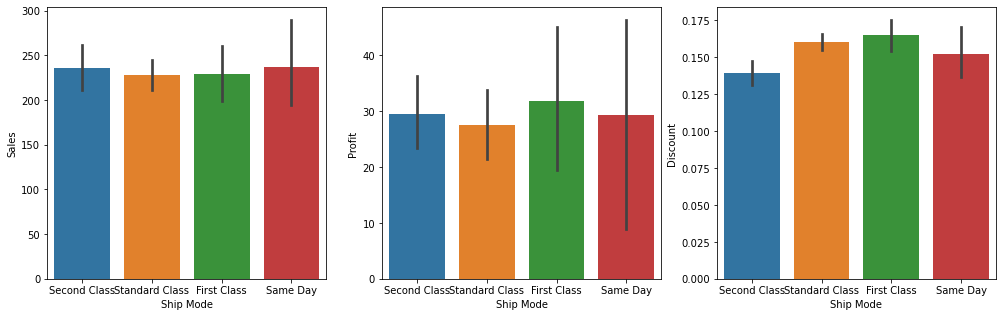

In [21]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Ship Mode', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data = data,ax=ax[2])
#Plotiing for Sales,profit and discount based on ship mode

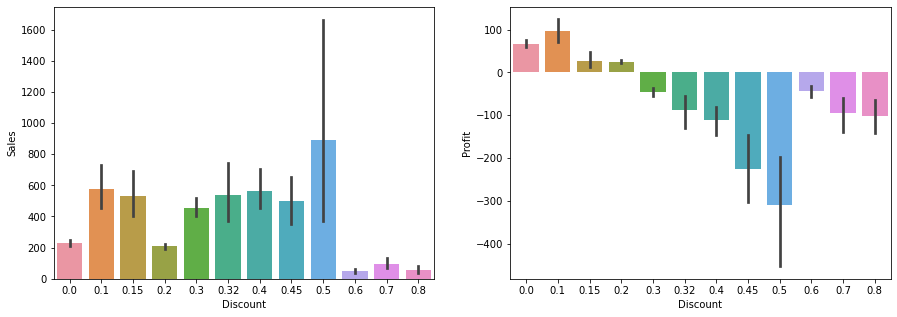

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Discount', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = data)
#Plotiing for Sales,profit based on discount

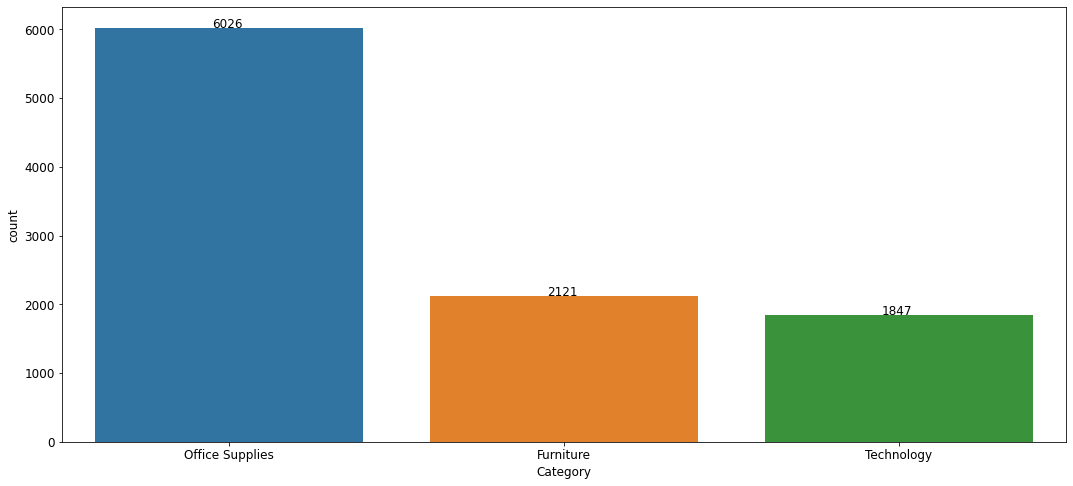

In [59]:
plt.figure(figsize=(18,8))
ax=sns.countplot("Category", data = data,order = data['Category'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()
#checking the no. of quantity in each category 

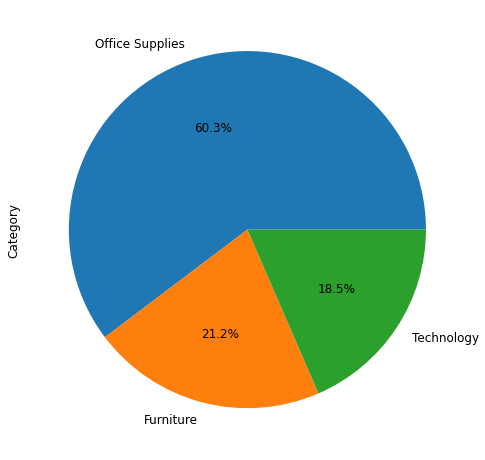

In [61]:
plt.figure(figsize=(8,10))
data['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
#percentage of category

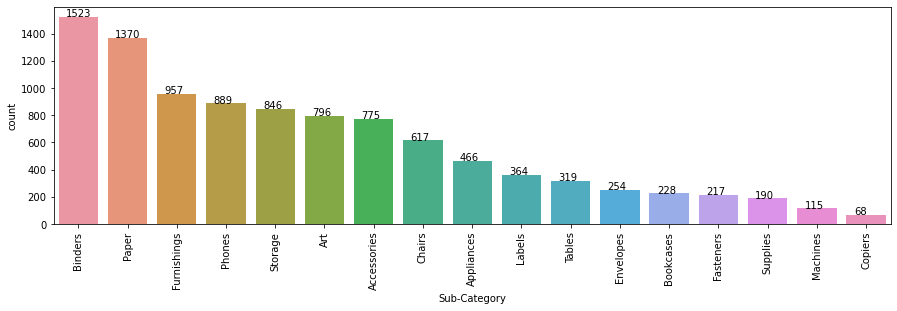

In [24]:
plt.figure(figsize=(15,4))
ax=sns.countplot("Sub-Category", data = data,order = data['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()
#checking the no. of quantity in each sub-category 

In [29]:
def autopct_format(values): 
    def my_format(pct): 
        plt.rcParams["figure.figsize"] = (13,5) 
        plt.rcParams['font.size'] = 12.0 
        plt.rcParams['font.weight'] = 6
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

In [30]:
Top_category = data.groupby(["Category"]).sum().sort_values("Sales", ascending=False) 
Top_category = Top_category[["Sales"]]
total_revenue_category = '$' + str(int(Top_category["Sales"].sum()))
Top_category.reset_index(inplace=True)

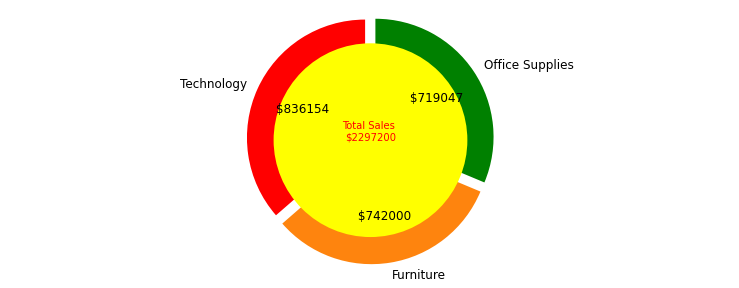

In [35]:
colors = ['red','#FE840E','green']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='yellow') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Sales \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()

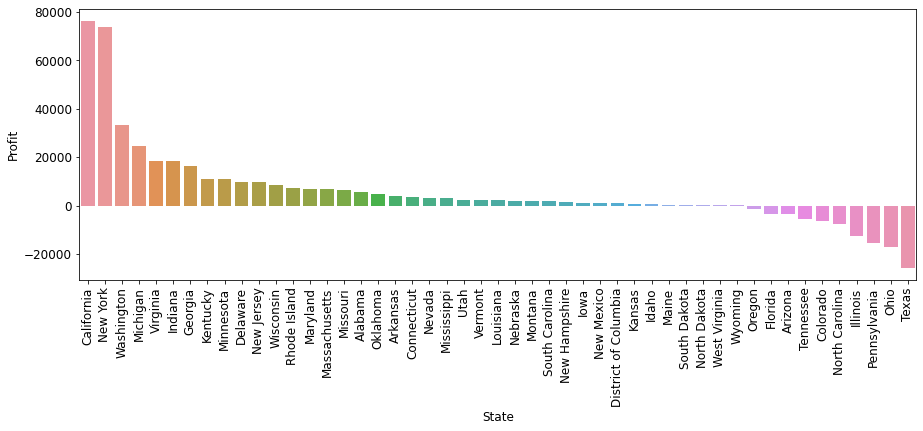

In [36]:
data_state= data.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()
#state-wise profit

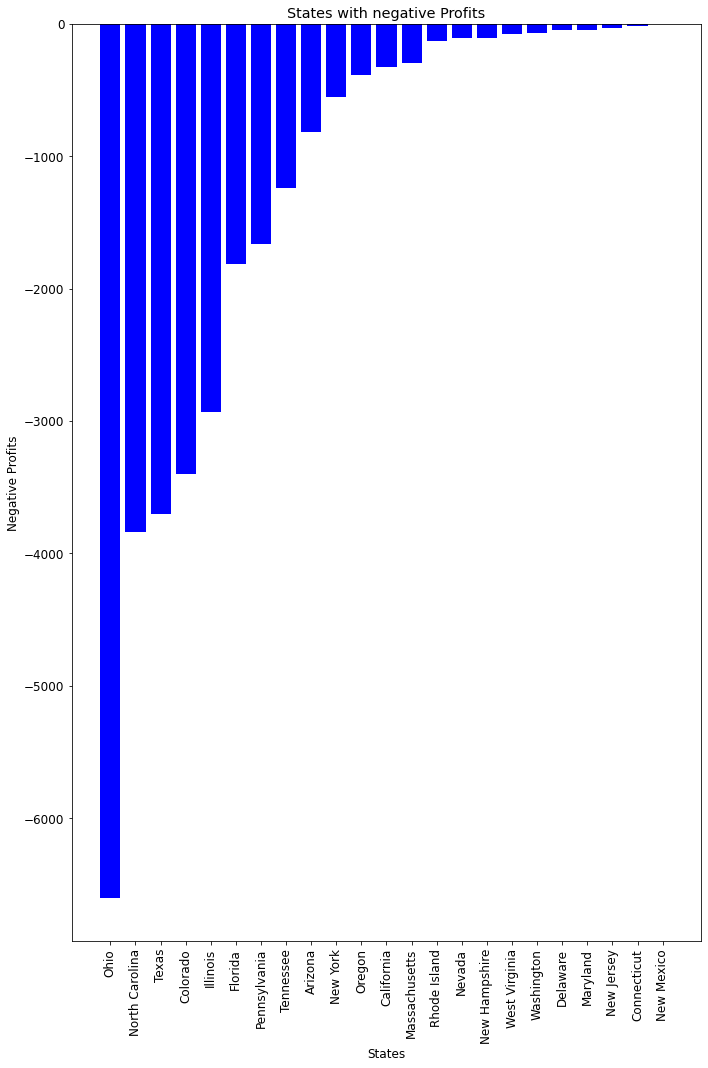

In [64]:
state_low_Profit=data.loc[data.Profit < 0]
state_low_Profit=state_low_Profit.sort_values("Profit")
fig,ax = plt.subplots(figsize=(10,15))
ax.bar(state_low_Profit['State'],state_low_Profit['Profit'],color='blue')
ax.set_title(label="States with negative Profits")
ax.set_ylabel('Negative Profits')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.tight_layout()
#states with profit in negative

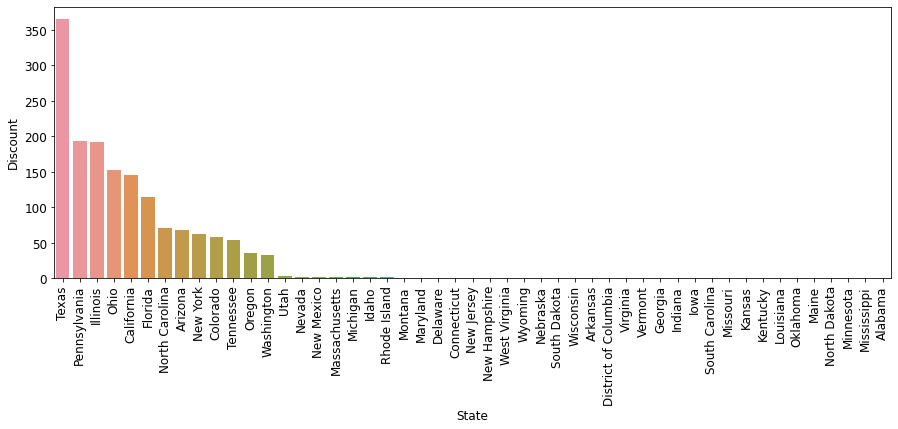

In [40]:
data_state= data.groupby(['State'])[['Discount']].sum().sort_values("Discount", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Discount', data = data_state)
plt.show()
#state-wise discount

# THANK YOU!!